#importing important libraries for this project

In [1007]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error

#Reading train and test data

In [1008]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car-train-data.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car-test-data.csv")

**Create data variable which is sum of train and test  part**

In [1009]:
Y=train_data["Price"]
len(train_data),len(test_data)

(6019, 1234)

In [1010]:
data=pd.concat([train_data.drop("Price",axis=1),test_data],axis=0)

#Clean, Transfrom and Reduce Data
I viewed test and train data there is a `New_Price` column which is mostly Null values so we are droping it, also `Unnamed: 0` columns because there is no use of this

In [1011]:
data.drop('New_Price',axis=1,inplace=True)
data.drop("Unnamed: 0",inplace=True,axis=1)
data.drop("Location",axis=1,inplace=True)

**Mileage Power Engine value is in numeric but there is unit written there we have to convert it into fully numeric**

In [1012]:
data["Mileage"]=data["Mileage"].str.replace(" kmpl","")
data["Mileage"]=data["Mileage"].str.replace(" km/kg","")
data["Power"]=data["Power"].str.replace(" bhp","")
data["Engine"]=data["Engine"].str.replace(" CC","")

In [1013]:
data.isna().sum()

Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               46
Power                46
Seats                53
dtype: int64

#Replace Null values
As few values of columns `Mileage` `Engine` and `Seats` are Null so i have replaces it with the mdeian value of their respective column

In [1014]:
data["Mileage"].fillna(data["Mileage"].median(),inplace=True)
data["Engine"].fillna(data["Engine"].median(),inplace=True)
data["Seats"].fillna(data["Seats"].median(),inplace=True)

Convert string values into float

In [1015]:
data["Mileage"]=data["Mileage"].astype(float)
data["Engine"]=data["Engine"].astype(float)
data =data.reset_index(drop=True)

In [1016]:
len(data),len(train_data)

(7253, 6019)

In [1017]:
data.isna().sum()

Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                46
Seats                 0
dtype: int64

**There are some value like null in Power columns so we have to remove it.**

In [1018]:
remove_pos=[]
for i in range(0,data.shape[0]):
    if data["Power"][i]=="null":
        remove_pos.append(i)
        # print(i,end=' ')
data=data.drop(remove_pos,axis=0)

In [1019]:
data["Power"]=data["Power"].astype(float)

Replaces Null values of Power column with Median

In [1020]:
data["Power"].fillna(data["Power"].median(),inplace=True)

In [1021]:
data.dtypes,len(data)

(Name                  object
 Year                   int64
 Kilometers_Driven      int64
 Fuel_Type             object
 Transmission          object
 Owner_Type            object
 Mileage              float64
 Engine               float64
 Power                float64
 Seats                float64
 dtype: object,
 7124)

In [1022]:
len(data)

7124

As Company name is not so clear so i just cut down brand name to it's first  two name which is best representation of a car.

In [1023]:
company=data["Name"].str.split(" ",expand=True)
data["Name"]=company[0]+company[1]

**Preparing a dictionary which will pass through `replace` function in our data set to replace string representation of some features into some comparable numerical values**

In [1024]:
replace_dict={
        "Fuel_Type":{
            "CNG":1,
            "Diesel":2,
            "Petrol":3,
            "LPG":4
        },
        "Transmission":{
            "Manual":1,
            "Automatic":2,
        },
        "Owner_Type":{
            "First":1,
            "Second":2,
            "Fourth & Above":4,
            "Third":3
        }
}
data.replace(replace_dict,inplace=True)
data.reset_index(drop=True)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,MarutiWagon,2010,72000,1,1,1,26.60,998.0,58.16,5.0
1,HyundaiCreta,2015,41000,2,1,1,19.67,1582.0,126.20,5.0
2,HondaJazz,2011,46000,3,1,1,18.20,1199.0,88.70,5.0
3,MarutiErtiga,2012,87000,2,1,1,20.77,1248.0,88.76,7.0
4,AudiA4,2013,40670,2,2,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
7119,VolkswagenVento,2011,89411,2,1,1,20.54,1598.0,103.60,5.0
7120,VolkswagenPolo,2015,59000,3,2,1,17.21,1197.0,103.60,5.0
7121,NissanMicra,2012,28000,2,1,1,23.08,1461.0,63.10,5.0
7122,VolkswagenPolo,2013,52262,3,2,3,17.20,1197.0,103.60,5.0


In [1025]:
data.dtypes

Name                  object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

Now Our Most of data is converted into numeric values



#convert categorical features into indicator variables
using `get_dummies()`

In [1026]:
data.reset_index(drop=True)
data=pd.get_dummies(data)

In [1027]:
len(data)

7124

In [1028]:
len(Y)

6019

As we have removed **some rows from data** which is removed from our train data too so we have to remove that row from our target columns that is **Price** column too.

In [1029]:
again_remove=[]
for i in range(0,len(remove_pos)):
    if(remove_pos[i]>len(train_data)):
        break
    again_remove.append(remove_pos[i])
Y.drop(again_remove,axis=0,inplace=True)

In [1030]:
len(Y)

5912

In [1031]:
l=len(train_data)-len(again_remove)
len(train_data),len(again_remove)

(6019, 107)

#Data is ready to train and test the model

create train and test variable

In [1032]:
train=data[:l]
test=data[l:]

#plots
Let's observe our train_data with few plots for better understanding of our data

[Text(0.5, 1.0, 'Owner_Type vs Price')]

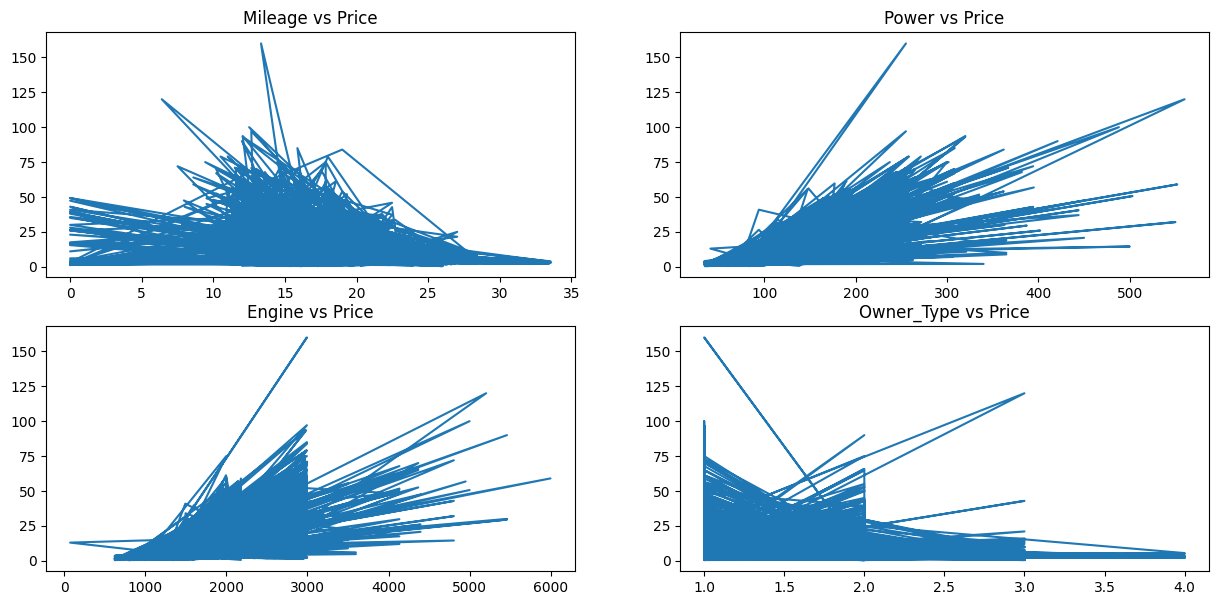

In [1033]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,7))
ax[0,0].plot(train.Mileage,Y)
ax[0,0].set(title="Mileage vs Price")

ax[0,1].plot(train.Power,Y)
ax[0,1].set(title="Power vs Price")

ax[1,0].plot(train.Engine,Y)
ax[1,0].set(title="Engine vs Price")

ax[1,1].plot(train.Owner_Type,Y)
ax[1,1].set(title="Owner_Type vs Price")

In [1034]:
corr_m.unstack().sort_values().dropna()

Kilometers_Driven  Year                -0.173048
Year               Kilometers_Driven   -0.173048
Price              Unnamed: 0          -0.020275
Unnamed: 0         Price               -0.020275
Kilometers_Driven  Price               -0.011493
Price              Kilometers_Driven   -0.011493
Seats              Unnamed: 0          -0.010832
Unnamed: 0         Seats               -0.010832
Kilometers_Driven  Unnamed: 0          -0.008734
Unnamed: 0         Kilometers_Driven   -0.008734
Year               Unnamed: 0           0.002354
Unnamed: 0         Year                 0.002354
Seats              Year                 0.012333
Year               Seats                0.012333
Seats              Price                0.052225
Price              Seats                0.052225
Kilometers_Driven  Seats                0.083113
Seats              Kilometers_Driven    0.083113
Year               Price                0.305327
Price              Year                 0.305327
Unnamed: 0         U

Split data for training and testing the model

In [1041]:
x_tr,x_te,y_tr,y_te=train_test_split(train,Y[:l],test_size=0.2)
x_tr.shape,test.shape,len(data)

((4729, 228), (1212, 228), 7124)

#prepare model
* choose model
*  train model
*   check r2 score and accuracy score

In [1042]:
def  Model(model,x_train,y_train,x_test,y_test):
    for key,value in model.items():
        value.fit(x_train,y_train)
        y_pred=value.predict(x_test)
        y_pred.shape
        print(f"{key } r2 score is {r2_score(y_pred,y_test)} and Mean squared error is {mean_squared_error(y_pred,y_test)}")
    return

In [1043]:
model_dict={
    "Ridge":Ridge(alpha=0.5),
    "BayesianRidge":BayesianRidge(),
    "RandomForestRegressor":RandomForestRegressor(n_jobs=-1)
}
Model(model_dict,x_tr,y_tr,x_te,y_te)

Ridge r2 score is 0.7846995830048951 and Mean squared error is 20.005867368154416
BayesianRidge r2 score is 0.7834930346987601 and Mean squared error is 20.077124300671176
RandomForestRegressor r2 score is 0.9168096903615256 and Mean squared error is 8.38409510769091


1.  Ridge

In [1044]:
reg1=Ridge(alpha=0.5)
reg1.fit(x_tr,y_tr)
y_pred=reg1.predict(x_te)
r2_score(y_pred,y_te)

0.7846995830048951

2. BayesianRidge

In [1045]:
reg2=BayesianRidge()
reg2.fit(x_tr,y_tr)
y_pred2=reg2.predict(x_te)
r2_score(y_pred2,y_te)

0.7834930346987601

3.  RandomForestRegressor


In [1046]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(x_tr,y_tr)
y_pred=model.predict(x_te)
r2_score(y_pred,y_te)

0.9134693325451513

Best performed model is RandomForestRegressor ✅ with good r2_score .
